In [2]:
from  discopy import *
import numpy as np

### Classical Diagram

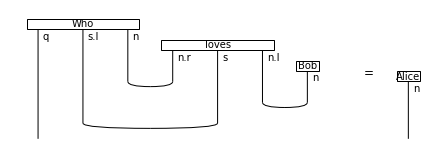

In [6]:
q, n, s = Ty('q'), Ty('n'), Ty('s')

Who = Word("Who", q @ s.l @ n)
loves = Word("loves", n.r @ s @ n.l)
Bob = Word("Bob", n)
Alice = Word("Alice", n)

F = tensor.Functor(
    ob={n: 2, s: 1},
    ar={Alice: [0, 1], loves: [0, 1, 1, 0], Bob: [1, 0]})

F.ob[q], F.ar[Who] = 2, [1, 0, 0, 1]

question = Who @ loves @ Bob\
    >> Id(q @ s.l) @ Cup(n, n.r) @ Id(s) @ Cup(n.l, n)\
    >> Id(q) @ Cup(s.l, s) 

answer = Alice

assert F(question) == F(answer)

drawing.equation(question, answer, figsize=(6, 2))

## Step 1: Generate the circuit for the question "Who loves Bob?"
We use the circuit generator to generate the circuit:  https://qnlp.cambridgequantum.com/generate.html

In [9]:
from discopy.quantum import *

In [10]:
# We create a random array var to feed into the CRz rotating phase.
var=np.random.random(11)
circ_question=Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(var[0]),
        CRz(var[1]),
        H,
        H,
        H,
        CRz(var[2]),
        CRz(var[3]),
        Ket(0, 0, 0),
        H,
        H,
        H,
        CRz(var[4]),
        CRz(var[5]),
        H,
        H,
        H,
        CRz(var[6]),
        CRz(var[7]),
        Ket(0),
        Rx(var[10]),
        Rz(var[9]),
        Rx(var[8]),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0),
        CX,
        H,
        sqrt(2),
        Bra(0, 0)],
    offsets=[0, 0, 1, 2, 0, 1, 0, 1, 2, 0, 1, 3, 3, 4, 5, 3, 4, 3, 4, 5, 3, 4, 6, 6, 6, 6, 2, 2, 3, 2, 1, 1, 2, 1, 1, 1, 2, 1]
)
   

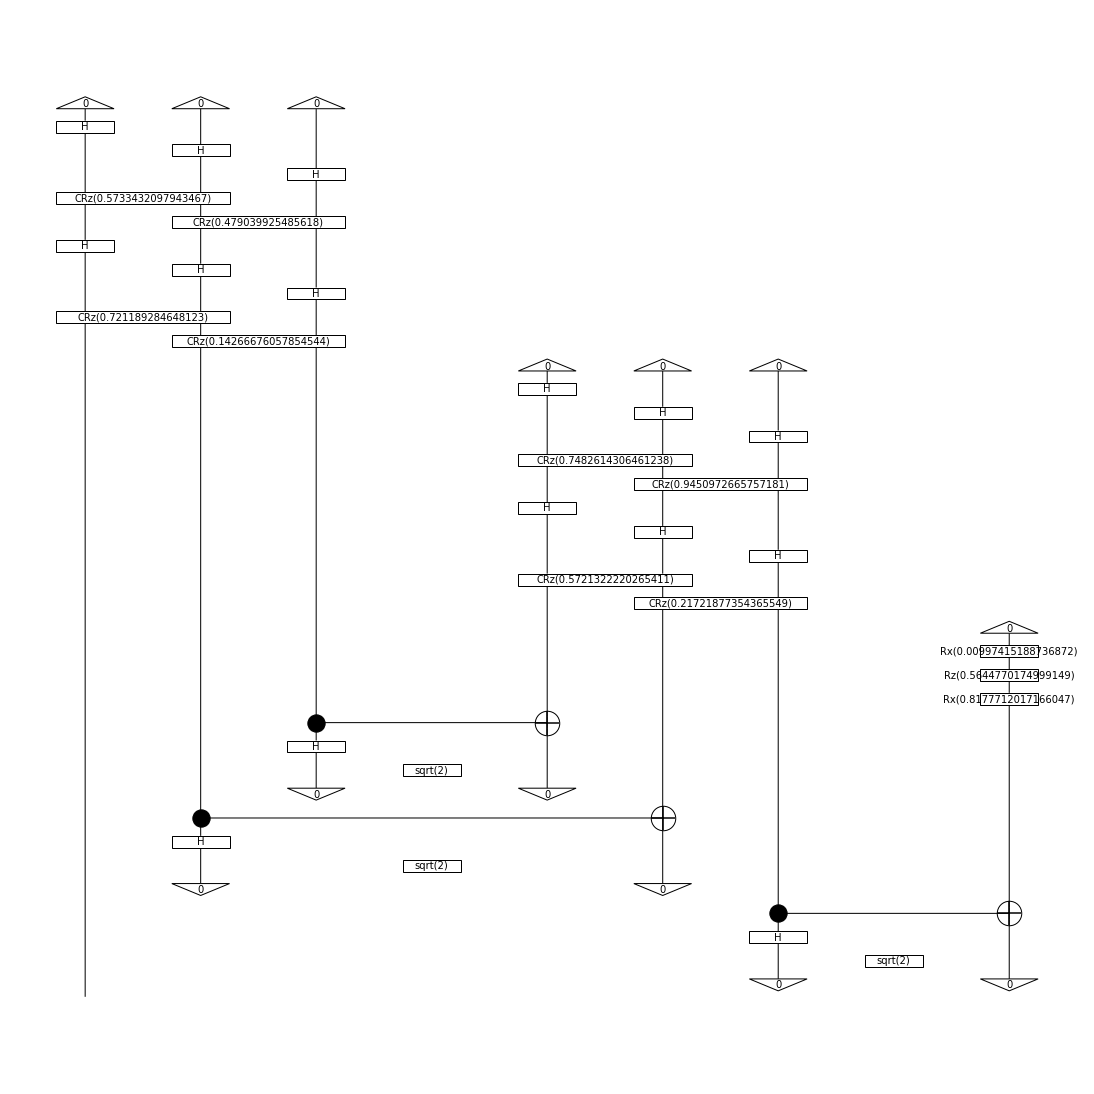

In [14]:
circ_question.draw(figsize=(15,15))

In [15]:
pprint = lambda c: print(str(c).replace(' >>', '\n  >>'))

In [16]:
pprint(circ_question)

Ket(0, 0, 0)
  >> H @ Id(2)
  >> Id(1) @ H @ Id(1)
  >> Id(2) @ H
  >> CRz(0.573) @ Id(1)
  >> Id(1) @ CRz(0.479)
  >> H @ Id(2)
  >> Id(1) @ H @ Id(1)
  >> Id(2) @ H
  >> CRz(0.721) @ Id(1)
  >> Id(1) @ CRz(0.143)
  >> Id(3) @ Ket(0, 0, 0)
  >> Id(3) @ H @ Id(2)
  >> Id(4) @ H @ Id(1)
  >> Id(5) @ H
  >> Id(3) @ CRz(0.748) @ Id(1)
  >> Id(4) @ CRz(0.945)
  >> Id(3) @ H @ Id(2)
  >> Id(4) @ H @ Id(1)
  >> Id(5) @ H
  >> Id(3) @ CRz(0.572) @ Id(1)
  >> Id(4) @ CRz(0.217)
  >> Id(6) @ Ket(0)
  >> Id(6) @ Rx(0.00997)
  >> Id(6) @ Rz(0.564)
  >> Id(6) @ Rx(0.818)
  >> Id(2) @ CX @ Id(3)
  >> Id(2) @ H @ Id(4)
  >> Id(3) @ sqrt(2) @ Id(4)
  >> Id(2) @ Bra(0, 0) @ Id(3)
  >> Id(1) @ CX @ Id(2)
  >> Id(1) @ H @ Id(3)
  >> Id(2) @ sqrt(2) @ Id(3)
  >> Id(1) @ Bra(0, 0) @ Id(2)
  >> Id(1) @ CX
  >> Id(1) @ H @ Id(1)
  >> Id(2) @ sqrt(2) @ Id(1)
  >> Id(1) @ Bra(0, 0)


## Step 2: Generate the circuit of the answer "Alice"
We use the circuit generator to generate the circuit:  https://qnlp.cambridgequantum.com/generate.html


In [17]:
# We create a random array var to feed into the CRz rotating phase.
var_ans=np.random.random(3)
circ_answer=Circuit(
    dom=Ty(),
    cod=qubit,
    boxes=[
        Ket(0),
        Rx(var_ans[2]),
        Rz(var_ans[1]),
        Rx(var_ans[0])],
    offsets=[0, 0, 0, 0]
)

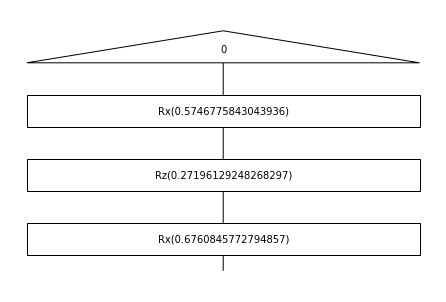

In [18]:
circ_answer.draw()

In [19]:
pprint(circ_answer)

Ket(0)
  >> Rx(0.575)
  >> Rz(0.272)
  >> Rx(0.676)


## Step 3: Implement the swap test

In [21]:
import pytket as tk

In [22]:
## Not implementable in Discopy
swap_test_tk = tk.Circuit(3,1).H(0).CSWAP(0,1,2).H(0).Measure(0, 0) 
Circuit.from_tk(swap_test_tk)

NotImplementedError: 

Since the Controlled-SWAP (or Fredkin) gate cannot be implemented directly with DisCoPy. We use the transpiler in Qiskit to decompose it into H, CX, and U1 gates.

In [23]:
from qiskit import QuantumCircuit
from qiskit.compiler import transpile
from qiskit.transpiler import PassManager

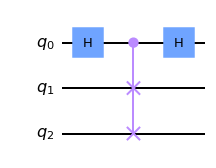

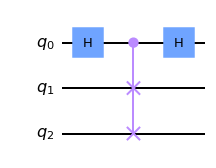

In [24]:
qc=QuantumCircuit(3)
qc.h(0)
qc.cswap(0,1,2)
qc.h(0)
qc.draw(output="mpl")

Use the qiskit transpiler to decompose the CSWAP gate into single- and two- qubit gates.

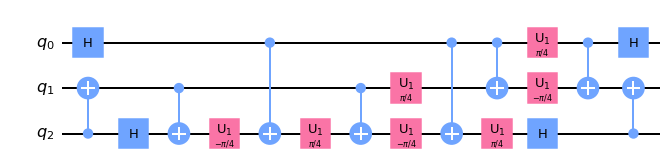

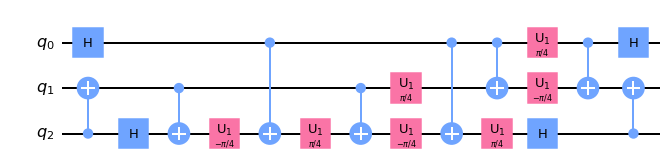

In [25]:
from qiskit.transpiler.passes import Unroller
pass_ = Unroller(['h','cx','u1'])
pm = PassManager(pass_)
new_circ = pm.run(qc)
new_circ.draw(output='mpl')

Use the result above, we can manually construct the swap test circuit with tk.Circuit.

In [26]:
swap_test_tk=tk.Circuit(3).H(0).CX(2,1).H(2).CX(1,2).\
Rz(-np.pi/4,2).\
CX(0,2).Rz(np.pi/4,2).CX(1,2).Rz(np.pi/4,1).Rz(-np.pi/4,2).CX(0,2).CX(0,1).Rz(np.pi/4,2).Rz(np.pi/4,0).\
Rz(-np.pi/4,1).H(2).CX(0,1).CX(2,1).H(0)
Circuit.from_tk(swap_test_tk)

Circuit(dom=Ty(), cod=Ty(), boxes=[Ket(0), Ket(0), Ket(0), H, SWAP, CX, SWAP, H, CX, Rz(1.61), SWAP, CX, SWAP, Rz(0.393), CX, Rz(0.393), Rz(1.61), SWAP, CX, SWAP, CX, Rz(0.393), Rz(0.393), Rz(1.61), H, CX, H, SWAP, CX, SWAP, Discard(qubit), Discard(qubit), Discard(qubit)], offsets=[0, 1, 2, 0, 1, 1, 1, 2, 1, 2, 1, 0, 1, 2, 1, 1, 2, 1, 0, 1, 0, 2, 0, 1, 2, 0, 0, 1, 1, 1, 0, 0, 0])

In [27]:
## Swap test circuit without the inputs and discard the "Discard" elements.
circ_swap_test=Circuit.from_tk(swap_test_tk)[3:-3]>>Measure()@Id(1)@Id(1)

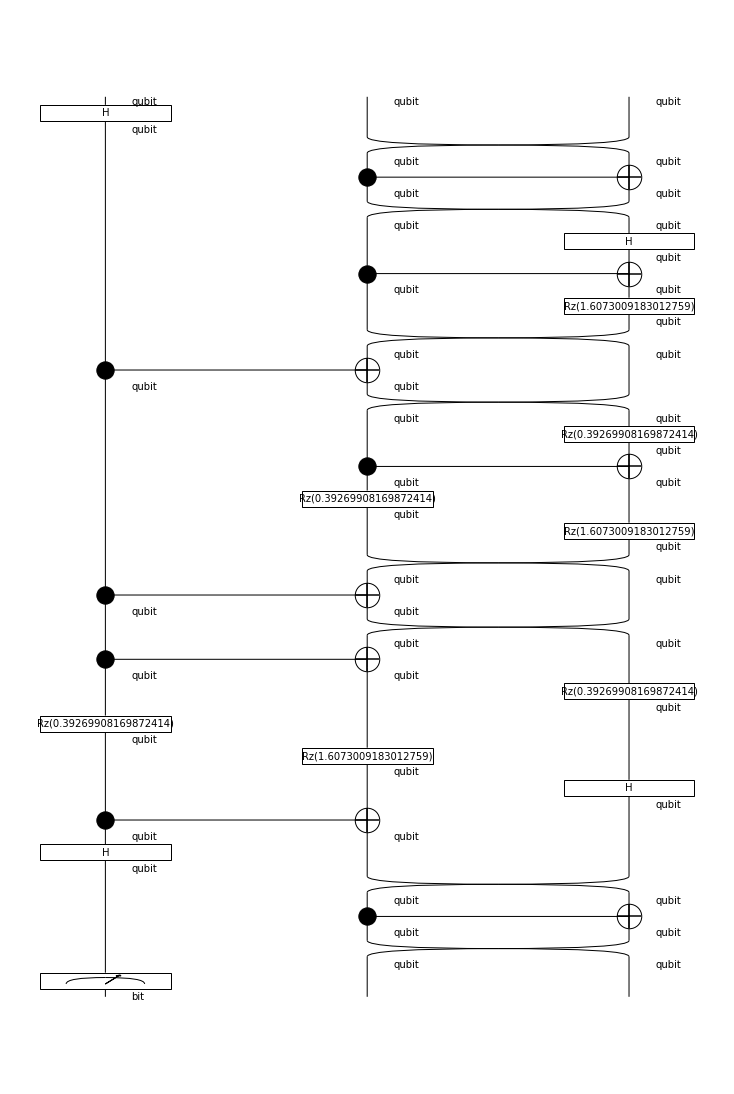

In [28]:
circ_swap_test.draw(figsize=(10,15))

In [180]:
pprint(circ_swap_test)

Ket(0)
  >> Id(1) @ Ket(0)
  >> Id(2) @ Ket(0)
  >> H @ Id(2)
  >> Id(1) @ SWAP
  >> Id(1) @ CX
  >> Id(1) @ SWAP
  >> Id(2) @ H
  >> Id(1) @ CX
  >> Id(2) @ Rz(1.61)
  >> Id(1) @ SWAP
  >> CX @ Id(1)
  >> Id(1) @ SWAP
  >> Id(2) @ Rz(0.393)
  >> Id(1) @ CX
  >> Id(1) @ Rz(0.393) @ Id(1)
  >> Id(2) @ Rz(1.61)
  >> Id(1) @ SWAP
  >> CX @ Id(1)
  >> Id(1) @ SWAP
  >> CX @ Id(1)
  >> Id(2) @ Rz(0.393)
  >> Rz(0.393) @ Id(2)
  >> Id(1) @ Rz(1.61) @ Id(1)
  >> Id(2) @ H
  >> CX @ Id(1)
  >> H @ Id(2)
  >> Id(1) @ SWAP
  >> Id(1) @ CX
  >> Id(1) @ SWAP
  >> Measure() @ Id(2)


## Step 4: Combine circuits of "Who loves Bob?", "Alice" with the swap test

In [29]:
circ_swap_test_combined=Ket(0)@ circ_question@circ_answer>> circ_swap_test

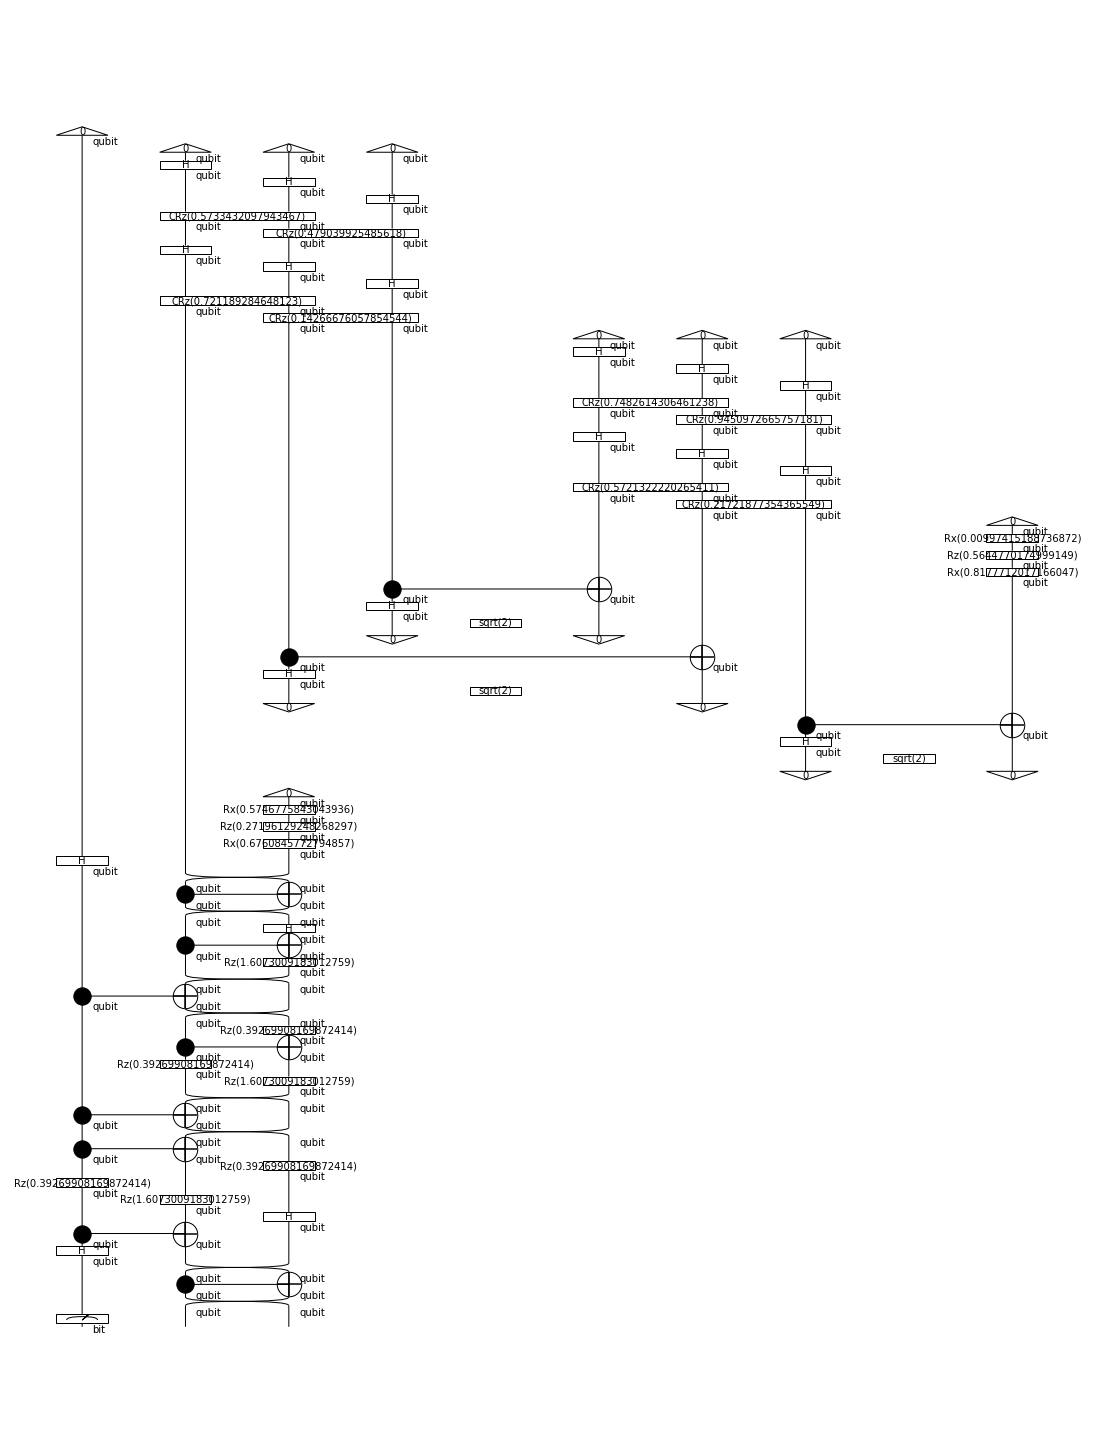

In [30]:
circ_swap_test_combined.draw(figsize=(15,20))

Because we need 8 qubits to perform the swap test, the publicly accessible quantum processors can only support up to 5 qubits, so we just use AerBackend instead of IBMQBackend for the measurement. 

In [31]:
from pytket.extensions.qiskit import AerBackend
from qiskit import IBMQ
from qiskit.visualization import plot_histogram
IBMQ.load_account()
backend = AerBackend() 

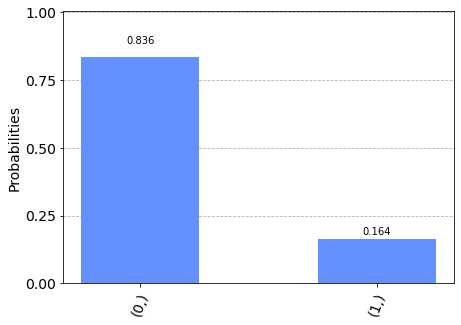

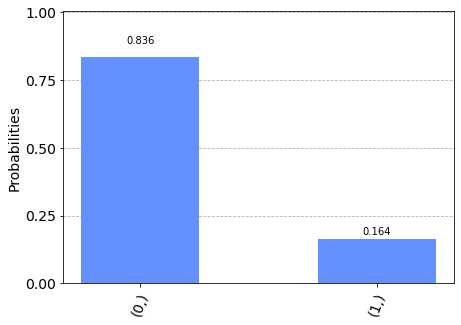

In [34]:
counts_swap_test=circ_swap_test_combined.get_counts(
    backend=backend,
    n_shots=2**13,
    compilation=backend.default_compilation_pass(2)
)
plot_histogram(counts_swap_test)

Ideally, if the probability of measuring |0> state in the ancilla qubit is 1 if "Alice" is the right answer. However, in the Aerbackend, with the randomized parameters in the ansatz, we still can get a probability of 0.6 to 0.8, depending on the initial random paramenters `var` and `var_ans`, that "Alice" is the right answer of the question "Who loves Bob?".